# Що таке базис?

*Базисний набір* — сукупність функцій, що слугують для представлення наближених орбіталей атома (чи молекули).  
Чим точніше цей набір обрано, тим точніше можна отримати результати при розв'язанні рівнянь Хартрі–Фока, що визначають електронну структуру системи.

Розкладання орбіталі $\phi$ через *базисні* функції (базисні орбіталі) $\chi_i$:

$$
\phi(x, y, z) = \sum_{i=1}^M c_i \chi_i(x, y, z | \zeta).
$$

---

# Базисні функції

- [Орбіталі слейтерового типу (STO)](https://en.wikipedia.org/wiki/Slater-type_orbital):

  $$
  \mathrm{STO} = \frac{(2\zeta)^{n+\tfrac12}}{\sqrt{(2n)!}} \, r^{n - 1} e^{-\zeta r} \times \text{(Linear combination of $Y$)}.
  $$

- [Орбіталі гаусового типу (GTO)](https://en.wikipedia.org/wiki/Gaussian_orbital):

  $$
  \mathrm{GTO}(x,y,z;\alpha,i,j,k) =
  \left(\frac{2\alpha}{\pi}\right)^{3/4}
  \sqrt{\frac{(8\alpha)^{i + j + k} \, i!j!k!}{(2i)!(2j)!(2k)!}}
  \; x^{i} y^{j} z^{k} e^{-\alpha r^2}.
  $$

  - Якщо $i + j + k = 0$ (тобто $i = j = k = 0$), GTO називається $s$-типу.  
  - Якщо $i + j + k = 1$, маємо гауссову функцію $p$-типу (містить множник $x$, $y$ або $z$).  
  - Якщо $i + j + k = 2$, маємо $d$-тип GTO, і так далі …

---

У GTO радіус $r$ підноситься до квадрату, тому добуток гауссових функцій знову є гауссовою функцією.  
Це робить обчислення інтегралів значно простішим і швидшим.  
Однак ціною є втрата точності. Щоб її компенсувати, комбінують кілька гауссових функцій: чим їх більше, тим точніше апроксимація.

Базисні набори у формі **STO-nG** (де $n$ — кількість GTO, об'єднаних для апроксимації STO) вважаються *мінімальними*.  
*Розширені* базисні набори враховують вищі орбіталі молекули та більш детально описують розподіл заряду.

---

# Мінімальний базис STO-3G

Базис [STO-3G](https://www.basissetexchange.org/basis/sto-3g/format/orca/?version=1&elements=2) з [BSE](https://www.basissetexchange.org):

```text
%basis
    NewGTO He
    S   3
    1         0.6362421394E+01       0.1543289673E+00
    2         0.1158922999E+01       0.5353281423E+00
    3         0.3136497915E+00       0.4446345422E+00
    end
end
```

Ці числа означають, що ми конструюємо на їх основі базисні функції $s$-типу за наступною формулою:

$$
	\text{STO-3G} =
	{\color{blue} c_1 \cdot  \left(\frac{2\alpha_1}{\pi}\right)^{3/4}e^{-\alpha_1r^2}
	}
	+
	{\color{magenta}
	c_2 \cdot  \left(\frac{2\alpha_2}{\pi}\right)^{3/4}e^{-\alpha_2r^2}
	}
	+
	{\color{teal}
	c_3 \cdot \left(\frac{2\alpha_3}{\pi}\right)^{3/4}e^{-\alpha_3r^2}
	}.
$$


In [1]:
from pyscf.gto.basis import bse
import matplotlib.pyplot as plt
import numpy as np

In [2]:
basis = bse.get_basis('STO-3G', elements = 'He')

In [3]:
basis

{'He': [[0,
   [6.362421394, 0.1543289673],
   [1.158922999, 0.5353281423],
   [0.3136497915, 0.4446345422]]]}

In [4]:
exponents = []
coefficients = []

# Витягуємо експоненти і коефіцієнти
for element, shells in basis.items():
    for shell in shells:
        # Пропускаємо перший елемент (кутовий момент)
        for gaussian in shell[1:]:
            exponents.append(gaussian[0])  # Експонента
            coefficients.append(gaussian[1])  # Коефіцієнт

# Вывод результатов
print("Экспоненты:", exponents)
print("Коэффициенты:", coefficients)

Экспоненты: [6.362421394, 1.158922999, 0.3136497915]
Коэффициенты: [0.1543289673, 0.5353281423, 0.4446345422]


In [22]:
def sGTO(exponent,  r):
    return (2 * exponent / np.pi) ** (3/4) * np.exp(-exponent * r ** 2)

In [34]:
def STO3G(exponent, coefficients, r):
    sum = 0
    for i in range(len(exponents)):
        sum += coefficients[i] * sGTO(exponents[i], r)
    return sum

In [35]:
def STO(r):
    zeta = 1.7
    return (4*np.pi) ** (-0.5) * (2 * zeta) ** (3 / 2) / 2 ** 0.5 * np.exp(- zeta * r)

In [36]:
r = np.linspace(0, 3, 100)

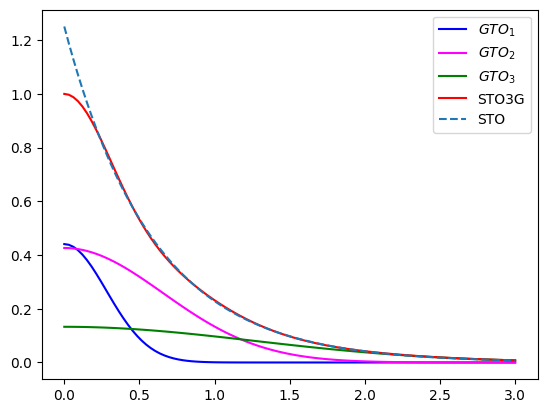

In [53]:
colors = ['blue', 'magenta', 'green']
for i in range(len(exponents)):
    plt.plot(r, coefficients[i] * sGTO(exponents[i], r), color=colors[i], label=rf"$GTO_{i+1}$")

plt.plot(r, STO3G(exponents, coefficients, r), color='red', label="STO3G")
plt.plot(r, STO(r), linestyle='--', label="STO")
plt.legend()
plt.show()